In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pyfolio as pf

C:\Users\Kazbek\anaconda3\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
etfs = ['SPY','EFA','TLT','SHY']
data = pd.concat([pd.read_csv(f"Global_Macro_ETFs/{etf}.csv", index_col = 'date', parse_dates = True)['adjClose'].rename(etf) for etf in etfs], axis = 1)
data = data.loc['2007-10-09':]

In [4]:
lookback_period = 252
returns = data.pct_change(lookback_period)
rets_252 = returns.loc[~returns['SPY'].isnull()]

rets_126 = data.loc[data.index[126]:].pct_change(126) # 6 months lookback period or 126 trading days
rets_126 = rets_126.loc[~rets_126['SPY'].isnull()]
rets_126

rets_84 = data.loc[data.index[168]:].pct_change(84) # 4 months lookback period or 84 trading days
rets_84 = rets_84.loc[~rets_84['SPY'].isnull()]
rets_84

rets_63 = data.loc[data.index[189]:].pct_change(63) # 3 months lookback period or 63 trading days
rets_63 = rets_63.loc[~rets_63['SPY'].isnull()]
rets_63

,SPY,EFA,TLT,SHY
date,,,,
2008-10-08 00:00:00+00:00,-0.217456,-0.298876,0.053091,0.020089
2008-10-09 00:00:00+00:00,-0.263526,-0.330259,0.059300,0.022844
2008-10-10 00:00:00+00:00,-0.274832,-0.353874,0.042681,0.022083
2008-10-13 00:00:00+00:00,-0.157665,-0.239033,0.029647,0.016108
2008-10-14 00:00:00+00:00,-0.190014,-0.268189,0.041849,0.017331
...,...,...,...,...
2021-10-05 00:00:00+00:00,0.000095,-0.016909,-0.027722,-0.000635
2021-10-06 00:00:00+00:00,0.012501,-0.010738,-0.026053,-0.001215
2021-10-07 00:00:00+00:00,0.010469,-0.019734,-0.022492,-0.001215


In [5]:
#inputs
lookback_period_m1 = 63 #choose loockback period for Model 1 
lookback_period_m2 = 84 #choose loockback period for Model 2

lookbacks = [252,126,84,63]
rets_dfs = [rets_252,rets_126,rets_84,rets_63]

for i in range(len(lookbacks)):
    if lookback_period_m1 == lookbacks[i]:
        retsM1 = rets_dfs[i]
    if lookback_period_m2 == lookbacks[i]:
        retsM2 = rets_dfs[i]

In [6]:
retsM1

,SPY,EFA,TLT,SHY
date,,,,
2008-10-08 00:00:00+00:00,-0.217456,-0.298876,0.053091,0.020089
2008-10-09 00:00:00+00:00,-0.263526,-0.330259,0.059300,0.022844
2008-10-10 00:00:00+00:00,-0.274832,-0.353874,0.042681,0.022083
2008-10-13 00:00:00+00:00,-0.157665,-0.239033,0.029647,0.016108
2008-10-14 00:00:00+00:00,-0.190014,-0.268189,0.041849,0.017331
...,...,...,...,...
2021-10-05 00:00:00+00:00,0.000095,-0.016909,-0.027722,-0.000635
2021-10-06 00:00:00+00:00,0.012501,-0.010738,-0.026053,-0.001215
2021-10-07 00:00:00+00:00,0.010469,-0.019734,-0.022492,-0.001215


In [7]:
retsM2

,SPY,EFA,TLT,SHY
date,,,,
2008-10-08 00:00:00+00:00,-0.275037,-0.346895,0.095812,0.029869
2008-10-09 00:00:00+00:00,-0.315598,-0.378018,0.089127,0.028784
2008-10-10 00:00:00+00:00,-0.334732,-0.399144,0.092392,0.035401
2008-10-13 00:00:00+00:00,-0.247650,-0.310023,0.080694,0.029696
2008-10-14 00:00:00+00:00,-0.259220,-0.327651,0.073493,0.029329
...,...,...,...,...
2021-10-05 00:00:00+00:00,0.032573,-0.036336,0.033363,-0.001409
2021-10-06 00:00:00+00:00,0.036644,-0.042300,0.031942,-0.001756
2021-10-07 00:00:00+00:00,0.047168,-0.032276,0.012214,-0.001873


In [8]:
#Model 1 
sum_df1 = pd.DataFrame(columns = ['SPY','EFA','TLT','SPYinP','EFAinP','TLTinP'])
timer = 1 #check every trading day
print('Lookback period is %d trading days'  %lookback_period_m1)
print('Rebalance every %d trading days' %timer)
print()
for i in range(len(retsM1)):
    if i%timer == 0:
        ndx = retsM1.iloc[i:i+timer].index
        vrem_df = data.loc[ndx,['SPY','EFA','TLT']]
        if retsM1.iat[i,0] > retsM1.iat[i,1]: # relative momentum check SPY/EFA
            best = 'SPY'
        else:
            best = 'EFA'
        if best == 'SPY': #absolute momentum check for SPY
            if retsM1.iat[i,0] > retsM1.iat[i,3]:
                vrem_df['SPYinP'] = 1.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 0.0
            else:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 1.0
                
                best = 'TLT'
        else: #absolute momentum check for EFA
            if retsM1.iat[i,1] > retsM1.iat[i,3]:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 1.0
                vrem_df['TLTinP'] = 0.0
            else:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 1.0
                best = 'TLT'
        print(retsM1.index[i],best)
        
        sum_df1 = pd.concat([sum_df1,vrem_df])
        


Lookback period is 63 trading days
Rebalance every 1 trading days

2008-10-08 00:00:00+00:00 TLT
2008-10-09 00:00:00+00:00 TLT
2008-10-10 00:00:00+00:00 TLT
2008-10-13 00:00:00+00:00 TLT
2008-10-14 00:00:00+00:00 TLT
2008-10-15 00:00:00+00:00 TLT
2008-10-16 00:00:00+00:00 TLT
2008-10-17 00:00:00+00:00 TLT
2008-10-20 00:00:00+00:00 TLT
2008-10-21 00:00:00+00:00 TLT
2008-10-22 00:00:00+00:00 TLT
2008-10-23 00:00:00+00:00 TLT
2008-10-24 00:00:00+00:00 TLT
2008-10-27 00:00:00+00:00 TLT
2008-10-28 00:00:00+00:00 TLT
2008-10-29 00:00:00+00:00 TLT
2008-10-30 00:00:00+00:00 TLT
2008-10-31 00:00:00+00:00 TLT
2008-11-03 00:00:00+00:00 TLT
2008-11-04 00:00:00+00:00 TLT
2008-11-05 00:00:00+00:00 TLT
2008-11-06 00:00:00+00:00 TLT
2008-11-07 00:00:00+00:00 TLT
2008-11-10 00:00:00+00:00 TLT
2008-11-11 00:00:00+00:00 TLT
2008-11-12 00:00:00+00:00 TLT
2008-11-13 00:00:00+00:00 TLT
2008-11-14 00:00:00+00:00 TLT
2008-11-17 00:00:00+00:00 TLT
2008-11-18 00:00:00+00:00 TLT
2008-11-19 00:00:00+00:00 TLT
200

2009-11-04 00:00:00+00:00 EFA
2009-11-05 00:00:00+00:00 EFA
2009-11-06 00:00:00+00:00 EFA
2009-11-09 00:00:00+00:00 EFA
2009-11-10 00:00:00+00:00 EFA
2009-11-11 00:00:00+00:00 EFA
2009-11-12 00:00:00+00:00 SPY
2009-11-13 00:00:00+00:00 EFA
2009-11-16 00:00:00+00:00 EFA
2009-11-17 00:00:00+00:00 SPY
2009-11-18 00:00:00+00:00 EFA
2009-11-19 00:00:00+00:00 SPY
2009-11-20 00:00:00+00:00 SPY
2009-11-23 00:00:00+00:00 SPY
2009-11-24 00:00:00+00:00 SPY
2009-11-25 00:00:00+00:00 SPY
2009-11-27 00:00:00+00:00 SPY
2009-11-30 00:00:00+00:00 SPY
2009-12-01 00:00:00+00:00 SPY
2009-12-02 00:00:00+00:00 SPY
2009-12-03 00:00:00+00:00 SPY
2009-12-04 00:00:00+00:00 SPY
2009-12-07 00:00:00+00:00 SPY
2009-12-08 00:00:00+00:00 SPY
2009-12-09 00:00:00+00:00 SPY
2009-12-10 00:00:00+00:00 SPY
2009-12-11 00:00:00+00:00 SPY
2009-12-14 00:00:00+00:00 SPY
2009-12-15 00:00:00+00:00 SPY
2009-12-16 00:00:00+00:00 SPY
2009-12-17 00:00:00+00:00 SPY
2009-12-18 00:00:00+00:00 SPY
2009-12-21 00:00:00+00:00 SPY
2009-12-22

2010-12-27 00:00:00+00:00 SPY
2010-12-28 00:00:00+00:00 SPY
2010-12-29 00:00:00+00:00 SPY
2010-12-30 00:00:00+00:00 SPY
2010-12-31 00:00:00+00:00 SPY
2011-01-03 00:00:00+00:00 SPY
2011-01-04 00:00:00+00:00 SPY
2011-01-05 00:00:00+00:00 SPY
2011-01-06 00:00:00+00:00 SPY
2011-01-07 00:00:00+00:00 SPY
2011-01-10 00:00:00+00:00 SPY
2011-01-11 00:00:00+00:00 SPY
2011-01-12 00:00:00+00:00 SPY
2011-01-13 00:00:00+00:00 SPY
2011-01-14 00:00:00+00:00 SPY
2011-01-18 00:00:00+00:00 SPY
2011-01-19 00:00:00+00:00 SPY
2011-01-20 00:00:00+00:00 SPY
2011-01-21 00:00:00+00:00 SPY
2011-01-24 00:00:00+00:00 SPY
2011-01-25 00:00:00+00:00 SPY
2011-01-26 00:00:00+00:00 SPY
2011-01-27 00:00:00+00:00 SPY
2011-01-28 00:00:00+00:00 SPY
2011-01-31 00:00:00+00:00 SPY
2011-02-01 00:00:00+00:00 SPY
2011-02-02 00:00:00+00:00 SPY
2011-02-03 00:00:00+00:00 SPY
2011-02-04 00:00:00+00:00 SPY
2011-02-07 00:00:00+00:00 SPY
2011-02-08 00:00:00+00:00 SPY
2011-02-09 00:00:00+00:00 SPY
2011-02-10 00:00:00+00:00 SPY
2011-02-11

2012-02-16 00:00:00+00:00 SPY
2012-02-17 00:00:00+00:00 EFA
2012-02-21 00:00:00+00:00 SPY
2012-02-22 00:00:00+00:00 SPY
2012-02-23 00:00:00+00:00 EFA
2012-02-24 00:00:00+00:00 EFA
2012-02-27 00:00:00+00:00 EFA
2012-02-28 00:00:00+00:00 EFA
2012-02-29 00:00:00+00:00 SPY
2012-03-01 00:00:00+00:00 SPY
2012-03-02 00:00:00+00:00 SPY
2012-03-05 00:00:00+00:00 SPY
2012-03-06 00:00:00+00:00 SPY
2012-03-07 00:00:00+00:00 SPY
2012-03-08 00:00:00+00:00 SPY
2012-03-09 00:00:00+00:00 SPY
2012-03-12 00:00:00+00:00 SPY
2012-03-13 00:00:00+00:00 SPY
2012-03-14 00:00:00+00:00 SPY
2012-03-15 00:00:00+00:00 SPY
2012-03-16 00:00:00+00:00 SPY
2012-03-19 00:00:00+00:00 SPY
2012-03-20 00:00:00+00:00 SPY
2012-03-21 00:00:00+00:00 SPY
2012-03-22 00:00:00+00:00 SPY
2012-03-23 00:00:00+00:00 SPY
2012-03-26 00:00:00+00:00 SPY
2012-03-27 00:00:00+00:00 SPY
2012-03-28 00:00:00+00:00 SPY
2012-03-29 00:00:00+00:00 SPY
2012-03-30 00:00:00+00:00 SPY
2012-04-02 00:00:00+00:00 SPY
2012-04-03 00:00:00+00:00 SPY
2012-04-04

2013-04-03 00:00:00+00:00 SPY
2013-04-04 00:00:00+00:00 SPY
2013-04-05 00:00:00+00:00 SPY
2013-04-08 00:00:00+00:00 SPY
2013-04-09 00:00:00+00:00 SPY
2013-04-10 00:00:00+00:00 SPY
2013-04-11 00:00:00+00:00 SPY
2013-04-12 00:00:00+00:00 SPY
2013-04-15 00:00:00+00:00 SPY
2013-04-16 00:00:00+00:00 SPY
2013-04-17 00:00:00+00:00 SPY
2013-04-18 00:00:00+00:00 SPY
2013-04-19 00:00:00+00:00 SPY
2013-04-22 00:00:00+00:00 SPY
2013-04-23 00:00:00+00:00 SPY
2013-04-24 00:00:00+00:00 SPY
2013-04-25 00:00:00+00:00 SPY
2013-04-26 00:00:00+00:00 SPY
2013-04-29 00:00:00+00:00 SPY
2013-04-30 00:00:00+00:00 SPY
2013-05-01 00:00:00+00:00 SPY
2013-05-02 00:00:00+00:00 SPY
2013-05-03 00:00:00+00:00 SPY
2013-05-06 00:00:00+00:00 SPY
2013-05-07 00:00:00+00:00 SPY
2013-05-08 00:00:00+00:00 SPY
2013-05-09 00:00:00+00:00 SPY
2013-05-10 00:00:00+00:00 SPY
2013-05-13 00:00:00+00:00 SPY
2013-05-14 00:00:00+00:00 SPY
2013-05-15 00:00:00+00:00 SPY
2013-05-16 00:00:00+00:00 SPY
2013-05-17 00:00:00+00:00 SPY
2013-05-20

2014-05-27 00:00:00+00:00 SPY
2014-05-28 00:00:00+00:00 SPY
2014-05-29 00:00:00+00:00 SPY
2014-05-30 00:00:00+00:00 SPY
2014-06-02 00:00:00+00:00 EFA
2014-06-03 00:00:00+00:00 SPY
2014-06-04 00:00:00+00:00 SPY
2014-06-05 00:00:00+00:00 SPY
2014-06-06 00:00:00+00:00 SPY
2014-06-09 00:00:00+00:00 SPY
2014-06-10 00:00:00+00:00 SPY
2014-06-11 00:00:00+00:00 EFA
2014-06-12 00:00:00+00:00 EFA
2014-06-13 00:00:00+00:00 EFA
2014-06-16 00:00:00+00:00 EFA
2014-06-17 00:00:00+00:00 EFA
2014-06-18 00:00:00+00:00 EFA
2014-06-19 00:00:00+00:00 EFA
2014-06-20 00:00:00+00:00 EFA
2014-06-23 00:00:00+00:00 EFA
2014-06-24 00:00:00+00:00 EFA
2014-06-25 00:00:00+00:00 SPY
2014-06-26 00:00:00+00:00 SPY
2014-06-27 00:00:00+00:00 SPY
2014-06-30 00:00:00+00:00 SPY
2014-07-01 00:00:00+00:00 SPY
2014-07-02 00:00:00+00:00 SPY
2014-07-03 00:00:00+00:00 SPY
2014-07-07 00:00:00+00:00 SPY
2014-07-08 00:00:00+00:00 SPY
2014-07-09 00:00:00+00:00 SPY
2014-07-10 00:00:00+00:00 SPY
2014-07-11 00:00:00+00:00 SPY
2014-07-14

2015-07-15 00:00:00+00:00 SPY
2015-07-16 00:00:00+00:00 SPY
2015-07-17 00:00:00+00:00 SPY
2015-07-20 00:00:00+00:00 SPY
2015-07-21 00:00:00+00:00 SPY
2015-07-22 00:00:00+00:00 SPY
2015-07-23 00:00:00+00:00 SPY
2015-07-24 00:00:00+00:00 TLT
2015-07-27 00:00:00+00:00 TLT
2015-07-28 00:00:00+00:00 TLT
2015-07-29 00:00:00+00:00 SPY
2015-07-30 00:00:00+00:00 SPY
2015-07-31 00:00:00+00:00 SPY
2015-08-03 00:00:00+00:00 TLT
2015-08-04 00:00:00+00:00 SPY
2015-08-05 00:00:00+00:00 SPY
2015-08-06 00:00:00+00:00 SPY
2015-08-07 00:00:00+00:00 TLT
2015-08-10 00:00:00+00:00 SPY
2015-08-11 00:00:00+00:00 TLT
2015-08-12 00:00:00+00:00 TLT
2015-08-13 00:00:00+00:00 TLT
2015-08-14 00:00:00+00:00 TLT
2015-08-17 00:00:00+00:00 TLT
2015-08-18 00:00:00+00:00 TLT
2015-08-19 00:00:00+00:00 TLT
2015-08-20 00:00:00+00:00 TLT
2015-08-21 00:00:00+00:00 TLT
2015-08-24 00:00:00+00:00 TLT
2015-08-25 00:00:00+00:00 TLT
2015-08-26 00:00:00+00:00 TLT
2015-08-27 00:00:00+00:00 TLT
2015-08-28 00:00:00+00:00 TLT
2015-08-31

2016-08-19 00:00:00+00:00 SPY
2016-08-22 00:00:00+00:00 SPY
2016-08-23 00:00:00+00:00 SPY
2016-08-24 00:00:00+00:00 SPY
2016-08-25 00:00:00+00:00 SPY
2016-08-26 00:00:00+00:00 SPY
2016-08-29 00:00:00+00:00 SPY
2016-08-30 00:00:00+00:00 SPY
2016-08-31 00:00:00+00:00 SPY
2016-09-01 00:00:00+00:00 SPY
2016-09-02 00:00:00+00:00 SPY
2016-09-06 00:00:00+00:00 SPY
2016-09-07 00:00:00+00:00 SPY
2016-09-08 00:00:00+00:00 SPY
2016-09-09 00:00:00+00:00 EFA
2016-09-12 00:00:00+00:00 EFA
2016-09-13 00:00:00+00:00 EFA
2016-09-14 00:00:00+00:00 EFA
2016-09-15 00:00:00+00:00 EFA
2016-09-16 00:00:00+00:00 EFA
2016-09-19 00:00:00+00:00 SPY
2016-09-20 00:00:00+00:00 SPY
2016-09-21 00:00:00+00:00 SPY
2016-09-22 00:00:00+00:00 SPY
2016-09-23 00:00:00+00:00 EFA
2016-09-26 00:00:00+00:00 EFA
2016-09-27 00:00:00+00:00 EFA
2016-09-28 00:00:00+00:00 EFA
2016-09-29 00:00:00+00:00 EFA
2016-09-30 00:00:00+00:00 EFA
2016-10-03 00:00:00+00:00 EFA
2016-10-04 00:00:00+00:00 EFA
2016-10-05 00:00:00+00:00 EFA
2016-10-06

2017-11-14 00:00:00+00:00 SPY
2017-11-15 00:00:00+00:00 SPY
2017-11-16 00:00:00+00:00 SPY
2017-11-17 00:00:00+00:00 SPY
2017-11-20 00:00:00+00:00 SPY
2017-11-21 00:00:00+00:00 SPY
2017-11-22 00:00:00+00:00 SPY
2017-11-24 00:00:00+00:00 SPY
2017-11-27 00:00:00+00:00 SPY
2017-11-28 00:00:00+00:00 SPY
2017-11-29 00:00:00+00:00 SPY
2017-11-30 00:00:00+00:00 SPY
2017-12-01 00:00:00+00:00 SPY
2017-12-04 00:00:00+00:00 SPY
2017-12-05 00:00:00+00:00 SPY
2017-12-06 00:00:00+00:00 SPY
2017-12-07 00:00:00+00:00 SPY
2017-12-08 00:00:00+00:00 SPY
2017-12-11 00:00:00+00:00 SPY
2017-12-12 00:00:00+00:00 SPY
2017-12-13 00:00:00+00:00 SPY
2017-12-14 00:00:00+00:00 SPY
2017-12-15 00:00:00+00:00 SPY
2017-12-18 00:00:00+00:00 SPY
2017-12-19 00:00:00+00:00 SPY
2017-12-20 00:00:00+00:00 SPY
2017-12-21 00:00:00+00:00 SPY
2017-12-22 00:00:00+00:00 SPY
2017-12-26 00:00:00+00:00 SPY
2017-12-27 00:00:00+00:00 SPY
2017-12-28 00:00:00+00:00 SPY
2017-12-29 00:00:00+00:00 SPY
2018-01-02 00:00:00+00:00 SPY
2018-01-03

2018-12-24 00:00:00+00:00 TLT
2018-12-26 00:00:00+00:00 TLT
2018-12-27 00:00:00+00:00 TLT
2018-12-28 00:00:00+00:00 TLT
2018-12-31 00:00:00+00:00 TLT
2019-01-02 00:00:00+00:00 TLT
2019-01-03 00:00:00+00:00 TLT
2019-01-04 00:00:00+00:00 TLT
2019-01-07 00:00:00+00:00 TLT
2019-01-08 00:00:00+00:00 TLT
2019-01-09 00:00:00+00:00 TLT
2019-01-10 00:00:00+00:00 TLT
2019-01-11 00:00:00+00:00 TLT
2019-01-14 00:00:00+00:00 TLT
2019-01-15 00:00:00+00:00 TLT
2019-01-16 00:00:00+00:00 TLT
2019-01-17 00:00:00+00:00 TLT
2019-01-18 00:00:00+00:00 TLT
2019-01-22 00:00:00+00:00 TLT
2019-01-23 00:00:00+00:00 TLT
2019-01-24 00:00:00+00:00 TLT
2019-01-25 00:00:00+00:00 TLT
2019-01-28 00:00:00+00:00 EFA
2019-01-29 00:00:00+00:00 EFA
2019-01-30 00:00:00+00:00 EFA
2019-01-31 00:00:00+00:00 EFA
2019-02-01 00:00:00+00:00 EFA
2019-02-04 00:00:00+00:00 EFA
2019-02-05 00:00:00+00:00 EFA
2019-02-06 00:00:00+00:00 TLT
2019-02-07 00:00:00+00:00 TLT
2019-02-08 00:00:00+00:00 TLT
2019-02-11 00:00:00+00:00 TLT
2019-02-12

2020-02-10 00:00:00+00:00 SPY
2020-02-11 00:00:00+00:00 SPY
2020-02-12 00:00:00+00:00 SPY
2020-02-13 00:00:00+00:00 SPY
2020-02-14 00:00:00+00:00 SPY
2020-02-18 00:00:00+00:00 SPY
2020-02-19 00:00:00+00:00 SPY
2020-02-20 00:00:00+00:00 SPY
2020-02-21 00:00:00+00:00 SPY
2020-02-24 00:00:00+00:00 SPY
2020-02-25 00:00:00+00:00 SPY
2020-02-26 00:00:00+00:00 TLT
2020-02-27 00:00:00+00:00 TLT
2020-02-28 00:00:00+00:00 TLT
2020-03-02 00:00:00+00:00 TLT
2020-03-03 00:00:00+00:00 TLT
2020-03-04 00:00:00+00:00 TLT
2020-03-05 00:00:00+00:00 TLT
2020-03-06 00:00:00+00:00 TLT
2020-03-09 00:00:00+00:00 TLT
2020-03-10 00:00:00+00:00 TLT
2020-03-11 00:00:00+00:00 TLT
2020-03-12 00:00:00+00:00 TLT
2020-03-13 00:00:00+00:00 TLT
2020-03-16 00:00:00+00:00 TLT
2020-03-17 00:00:00+00:00 TLT
2020-03-18 00:00:00+00:00 TLT
2020-03-19 00:00:00+00:00 TLT
2020-03-20 00:00:00+00:00 TLT
2020-03-23 00:00:00+00:00 TLT
2020-03-24 00:00:00+00:00 TLT
2020-03-25 00:00:00+00:00 TLT
2020-03-26 00:00:00+00:00 TLT
2020-03-27

2021-05-21 00:00:00+00:00 SPY
2021-05-24 00:00:00+00:00 SPY
2021-05-25 00:00:00+00:00 SPY
2021-05-26 00:00:00+00:00 SPY
2021-05-27 00:00:00+00:00 SPY
2021-05-28 00:00:00+00:00 SPY
2021-06-01 00:00:00+00:00 SPY
2021-06-02 00:00:00+00:00 SPY
2021-06-03 00:00:00+00:00 SPY
2021-06-04 00:00:00+00:00 SPY
2021-06-07 00:00:00+00:00 SPY
2021-06-08 00:00:00+00:00 SPY
2021-06-09 00:00:00+00:00 SPY
2021-06-10 00:00:00+00:00 SPY
2021-06-11 00:00:00+00:00 SPY
2021-06-14 00:00:00+00:00 EFA
2021-06-15 00:00:00+00:00 EFA
2021-06-16 00:00:00+00:00 SPY
2021-06-17 00:00:00+00:00 SPY
2021-06-18 00:00:00+00:00 SPY
2021-06-21 00:00:00+00:00 SPY
2021-06-22 00:00:00+00:00 SPY
2021-06-23 00:00:00+00:00 SPY
2021-06-24 00:00:00+00:00 SPY
2021-06-25 00:00:00+00:00 SPY
2021-06-28 00:00:00+00:00 SPY
2021-06-29 00:00:00+00:00 SPY
2021-06-30 00:00:00+00:00 SPY
2021-07-01 00:00:00+00:00 SPY
2021-07-02 00:00:00+00:00 SPY
2021-07-06 00:00:00+00:00 SPY
2021-07-07 00:00:00+00:00 SPY
2021-07-08 00:00:00+00:00 SPY
2021-07-09

In [9]:
sum_df1

,SPY,EFA,TLT,SPYinP,EFAinP,TLTinP
2008-10-08 00:00:00+00:00,75.186607,32.013596,67.771120,0.0,0.0,1.0
2008-10-09 00:00:00+00:00,69.935647,30.099621,67.200855,0.0,0.0,1.0
2008-10-10 00:00:00+00:00,68.239305,28.976409,66.727953,0.0,0.0,1.0
2008-10-13 00:00:00+00:00,78.147496,33.580073,65.872555,0.0,0.0,1.0
2008-10-14 00:00:00+00:00,76.990898,32.889181,65.448334,0.0,0.0,1.0
...,...,...,...,...,...,...
2021-10-05 00:00:00+00:00,433.100000,77.910000,143.580000,1.0,0.0,0.0
2021-10-06 00:00:00+00:00,434.900000,77.390000,144.390000,1.0,0.0,0.0
2021-10-07 00:00:00+00:00,438.660000,77.990000,142.880000,1.0,0.0,0.0
2021-10-08 00:00:00+00:00,437.860000,77.980000,141.880000,1.0,0.0,0.0


In [10]:
#Model 2 
sum_df2 = pd.DataFrame(columns = ['SPY','EFA','TLT','SPYinP','EFAinP','TLTinP'])
timer = 3 #check every 3 trading days
print('Lookback period is %d trading days'  %lookback_period_m2)
print('Rebalance every %d trading days' %timer)
print()
for i in range(len(retsM2)):
    if i%timer == 0:
        ndx = retsM2.iloc[i:i+timer].index
        vrem_df = data.loc[ndx,['SPY','EFA','TLT']]
        if retsM2.iat[i,0] > retsM2.iat[i,1]: # relative momentum check SPY/EFA
            best = 'SPY'
        else:
            best = 'EFA'
        if best == 'SPY': #absolute momentum check for SPY
            if retsM2.iat[i,0] > retsM2.iat[i,3]:
                vrem_df['SPYinP'] = 1.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 0.0
            else:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 1.0
                
                best = 'TLT'
        else: #absolute momentum check for EFA
            if retsM2.iat[i,1] > retsM2.iat[i,3]:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 1.0
                vrem_df['TLTinP'] = 0.0
            else:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 1.0
                best = 'TLT'
        print(retsM2.index[i],best)
        
        sum_df2 = pd.concat([sum_df2,vrem_df])
        

Lookback period is 84 trading days
Rebalance every 3 trading days

2008-10-08 00:00:00+00:00 TLT
2008-10-13 00:00:00+00:00 TLT
2008-10-16 00:00:00+00:00 TLT
2008-10-21 00:00:00+00:00 TLT
2008-10-24 00:00:00+00:00 TLT
2008-10-29 00:00:00+00:00 TLT
2008-11-03 00:00:00+00:00 TLT
2008-11-06 00:00:00+00:00 TLT
2008-11-11 00:00:00+00:00 TLT
2008-11-14 00:00:00+00:00 TLT
2008-11-19 00:00:00+00:00 TLT
2008-11-24 00:00:00+00:00 TLT
2008-11-28 00:00:00+00:00 TLT
2008-12-03 00:00:00+00:00 TLT
2008-12-08 00:00:00+00:00 TLT
2008-12-11 00:00:00+00:00 TLT
2008-12-16 00:00:00+00:00 TLT
2008-12-19 00:00:00+00:00 TLT
2008-12-24 00:00:00+00:00 TLT
2008-12-30 00:00:00+00:00 TLT
2009-01-05 00:00:00+00:00 TLT
2009-01-08 00:00:00+00:00 TLT
2009-01-13 00:00:00+00:00 TLT
2009-01-16 00:00:00+00:00 TLT
2009-01-22 00:00:00+00:00 TLT
2009-01-27 00:00:00+00:00 TLT
2009-01-30 00:00:00+00:00 TLT
2009-02-04 00:00:00+00:00 TLT
2009-02-09 00:00:00+00:00 TLT
2009-02-12 00:00:00+00:00 TLT
2009-02-18 00:00:00+00:00 TLT
200

2012-07-10 00:00:00+00:00 TLT
2012-07-13 00:00:00+00:00 TLT
2012-07-18 00:00:00+00:00 TLT
2012-07-23 00:00:00+00:00 TLT
2012-07-26 00:00:00+00:00 TLT
2012-07-31 00:00:00+00:00 TLT
2012-08-03 00:00:00+00:00 TLT
2012-08-08 00:00:00+00:00 SPY
2012-08-13 00:00:00+00:00 SPY
2012-08-16 00:00:00+00:00 SPY
2012-08-21 00:00:00+00:00 SPY
2012-08-24 00:00:00+00:00 SPY
2012-08-29 00:00:00+00:00 SPY
2012-09-04 00:00:00+00:00 SPY
2012-09-07 00:00:00+00:00 SPY
2012-09-12 00:00:00+00:00 EFA
2012-09-17 00:00:00+00:00 EFA
2012-09-20 00:00:00+00:00 EFA
2012-09-25 00:00:00+00:00 EFA
2012-09-28 00:00:00+00:00 EFA
2012-10-03 00:00:00+00:00 EFA
2012-10-08 00:00:00+00:00 EFA
2012-10-11 00:00:00+00:00 EFA
2012-10-16 00:00:00+00:00 EFA
2012-10-19 00:00:00+00:00 EFA
2012-10-24 00:00:00+00:00 EFA
2012-10-31 00:00:00+00:00 EFA
2012-11-05 00:00:00+00:00 EFA
2012-11-08 00:00:00+00:00 EFA
2012-11-13 00:00:00+00:00 EFA
2012-11-16 00:00:00+00:00 EFA
2012-11-21 00:00:00+00:00 EFA
2012-11-27 00:00:00+00:00 EFA
2012-11-30

2015-11-18 00:00:00+00:00 TLT
2015-11-23 00:00:00+00:00 SPY
2015-11-27 00:00:00+00:00 TLT
2015-12-02 00:00:00+00:00 SPY
2015-12-07 00:00:00+00:00 SPY
2015-12-10 00:00:00+00:00 TLT
2015-12-15 00:00:00+00:00 TLT
2015-12-18 00:00:00+00:00 TLT
2015-12-23 00:00:00+00:00 SPY
2015-12-29 00:00:00+00:00 SPY
2016-01-04 00:00:00+00:00 SPY
2016-01-07 00:00:00+00:00 TLT
2016-01-12 00:00:00+00:00 TLT
2016-01-15 00:00:00+00:00 TLT
2016-01-21 00:00:00+00:00 TLT
2016-01-26 00:00:00+00:00 TLT
2016-01-29 00:00:00+00:00 SPY
2016-02-03 00:00:00+00:00 TLT
2016-02-08 00:00:00+00:00 TLT
2016-02-11 00:00:00+00:00 TLT
2016-02-17 00:00:00+00:00 TLT
2016-02-22 00:00:00+00:00 TLT
2016-02-25 00:00:00+00:00 TLT
2016-03-01 00:00:00+00:00 TLT
2016-03-04 00:00:00+00:00 TLT
2016-03-09 00:00:00+00:00 TLT
2016-03-14 00:00:00+00:00 TLT
2016-03-17 00:00:00+00:00 SPY
2016-03-22 00:00:00+00:00 TLT
2016-03-28 00:00:00+00:00 TLT
2016-03-31 00:00:00+00:00 TLT
2016-04-05 00:00:00+00:00 TLT
2016-04-08 00:00:00+00:00 TLT
2016-04-13

2019-03-20 00:00:00+00:00 EFA
2019-03-25 00:00:00+00:00 SPY
2019-03-28 00:00:00+00:00 SPY
2019-04-02 00:00:00+00:00 SPY
2019-04-05 00:00:00+00:00 EFA
2019-04-10 00:00:00+00:00 SPY
2019-04-15 00:00:00+00:00 SPY
2019-04-18 00:00:00+00:00 SPY
2019-04-24 00:00:00+00:00 SPY
2019-04-29 00:00:00+00:00 SPY
2019-05-02 00:00:00+00:00 SPY
2019-05-07 00:00:00+00:00 SPY
2019-05-10 00:00:00+00:00 SPY
2019-05-15 00:00:00+00:00 SPY
2019-05-20 00:00:00+00:00 SPY
2019-05-23 00:00:00+00:00 SPY
2019-05-29 00:00:00+00:00 SPY
2019-06-03 00:00:00+00:00 SPY
2019-06-06 00:00:00+00:00 SPY
2019-06-11 00:00:00+00:00 SPY
2019-06-14 00:00:00+00:00 SPY
2019-06-19 00:00:00+00:00 SPY
2019-06-24 00:00:00+00:00 SPY
2019-06-27 00:00:00+00:00 SPY
2019-07-02 00:00:00+00:00 SPY
2019-07-08 00:00:00+00:00 SPY
2019-07-11 00:00:00+00:00 SPY
2019-07-16 00:00:00+00:00 SPY
2019-07-19 00:00:00+00:00 SPY
2019-07-24 00:00:00+00:00 SPY
2019-07-29 00:00:00+00:00 SPY
2019-08-01 00:00:00+00:00 SPY
2019-08-06 00:00:00+00:00 TLT
2019-08-09

In [11]:
sum_df2

,SPY,EFA,TLT,SPYinP,EFAinP,TLTinP
2008-10-08 00:00:00+00:00,75.186607,32.013596,67.771120,0.0,0.0,1.0
2008-10-09 00:00:00+00:00,69.935647,30.099621,67.200855,0.0,0.0,1.0
2008-10-10 00:00:00+00:00,68.239305,28.976409,66.727953,0.0,0.0,1.0
2008-10-13 00:00:00+00:00,78.147496,33.580073,65.872555,0.0,0.0,1.0
2008-10-14 00:00:00+00:00,76.990898,32.889181,65.448334,0.0,0.0,1.0
...,...,...,...,...,...,...
2021-10-05 00:00:00+00:00,433.100000,77.910000,143.580000,1.0,0.0,0.0
2021-10-06 00:00:00+00:00,434.900000,77.390000,144.390000,1.0,0.0,0.0
2021-10-07 00:00:00+00:00,438.660000,77.990000,142.880000,1.0,0.0,0.0
2021-10-08 00:00:00+00:00,437.860000,77.980000,141.880000,1.0,0.0,0.0


In [12]:
sum_df = sum_df2[['SPY','EFA','TLT']].copy()

In [13]:
sum_df['SPYinP'] = 0.0
sum_df['EFAinP'] = 0.0
sum_df['TLTinP'] = 0.0
sum_df.head(2)

,SPY,EFA,TLT,SPYinP,EFAinP,TLTinP
2008-10-08 00:00:00+00:00,75.186607,32.013596,67.771120,0.0,0.0,0.0
2008-10-09 00:00:00+00:00,69.935647,30.099621,67.200855,0.0,0.0,0.0


In [14]:
for i in range(len(sum_df)):
    if sum_df1.iat[i,5] == 1.0 and sum_df2.iat[i,5] == 1.0: 
        sum_df.iat[i,5] = 1.0
        sum_df.iat[i,3] = 0.0
        sum_df.iat[i,4] = 0.0
    else:
        if sum_df1.iat[i,5] == 1.0 and sum_df2.iat[i,5] == 0.0:
            sum_df.iat[i,5] = 1.0*0.5
            sum_df.iat[i,3] = sum_df2.iat[i,3]*0.5
            sum_df.iat[i,4] = sum_df2.iat[i,4]*0.5
        
        if sum_df1.iat[i,5] == 0.0 and sum_df2.iat[i,5] == 0.0:
            sum_df.iat[i,5] = 0.0
            sum_df.iat[i,3] = sum_df2.iat[i,3]
            sum_df.iat[i,4] = sum_df2.iat[i,4]
        
        if sum_df1.iat[i,5] == 0.0 and sum_df2.iat[i,5] == 1.0:
            sum_df.iat[i,5] = 1.0
            sum_df.iat[i,3] = 0.0 
            sum_df.iat[i,4] = 0.0 
            


In [15]:
sum_df

,SPY,EFA,TLT,SPYinP,EFAinP,TLTinP
2008-10-08 00:00:00+00:00,75.186607,32.013596,67.771120,0.0,0.0,1.0
2008-10-09 00:00:00+00:00,69.935647,30.099621,67.200855,0.0,0.0,1.0
2008-10-10 00:00:00+00:00,68.239305,28.976409,66.727953,0.0,0.0,1.0
2008-10-13 00:00:00+00:00,78.147496,33.580073,65.872555,0.0,0.0,1.0
2008-10-14 00:00:00+00:00,76.990898,32.889181,65.448334,0.0,0.0,1.0
...,...,...,...,...,...,...
2021-10-05 00:00:00+00:00,433.100000,77.910000,143.580000,1.0,0.0,0.0
2021-10-06 00:00:00+00:00,434.900000,77.390000,144.390000,1.0,0.0,0.0
2021-10-07 00:00:00+00:00,438.660000,77.990000,142.880000,1.0,0.0,0.0
2021-10-08 00:00:00+00:00,437.860000,77.980000,141.880000,1.0,0.0,0.0


In [16]:
sum_df['SPYCh%'] = sum_df['SPY'].pct_change().fillna(0.0)
sum_df['EFACh%'] = sum_df['EFA'].pct_change().fillna(0.0)
sum_df['TLTCh%'] = sum_df['TLT'].pct_change().fillna(0.0)
sum_df['Portfolio_Ch%'] = 0.0
for i in range(1,len(sum_df)): 
    sum_df.iloc[i,9] = (sum_df.iloc[i-1,3:6].values*sum_df.iloc[i,6:9].values).sum()
sum_df['Val_ch'] = sum_df['Portfolio_Ch%'] + 1
sum_df['CumulEquity'] = sum_df['Val_ch'].cumprod()

In [17]:
sum_df

,SPY,EFA,TLT,SPYinP,EFAinP,TLTinP,SPYCh%,EFACh%,TLTCh%,Portfolio_Ch%,Val_ch,CumulEquity
2008-10-08 00:00:00+00:00,75.186607,32.013596,67.771120,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
2008-10-09 00:00:00+00:00,69.935647,30.099621,67.200855,0.0,0.0,1.0,-0.069839,-0.059786,-0.008415,-0.008415,0.991585,0.991585
2008-10-10 00:00:00+00:00,68.239305,28.976409,66.727953,0.0,0.0,1.0,-0.024256,-0.037316,-0.007037,-0.007037,0.992963,0.984607
2008-10-13 00:00:00+00:00,78.147496,33.580073,65.872555,0.0,0.0,1.0,0.145198,0.158876,-0.012819,-0.012819,0.987181,0.971986
2008-10-14 00:00:00+00:00,76.990898,32.889181,65.448334,0.0,0.0,1.0,-0.014800,-0.020574,-0.006440,-0.006440,0.993560,0.965726
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05 00:00:00+00:00,433.100000,77.910000,143.580000,1.0,0.0,0.0,0.010405,0.006849,-0.009657,0.000374,1.000374,5.548416
2021-10-06 00:00:00+00:00,434.900000,77.390000,144.390000,1.0,0.0,0.0,0.004156,-0.006674,0.005641,0.004156,1.004156,5.571476
2021-10-07 00:00:00+00:00,438.660000,77.990000,142.880000,1.0,0.0,0.0,0.008646,0.007753,-0.010458,0.008646,1.008646,5.619645
2021-10-08 00:00:00+00:00,437.860000,77.980000,141.880000,1.0,0.0,0.0,-0.001824,-0.000128,-0.006999,-0.001824,0.998176,5.609396


Start date,2008-10-08
End date,2021-10-11
Total months,155
,Backtest
Annual return,14.126%
Cumulative returns,456.879%
Annual volatility,15.051%
Sharpe ratio,0.95
Calmar ratio,0.64
Stability,0.95
Max drawdown,-22.123%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.12,2008-12-30,2009-05-15,2009-09-16,187
1,15.73,2020-03-09,2020-03-18,2020-04-21,32
2,14.63,2010-04-23,2010-06-10,2010-10-13,124
3,14.35,2015-05-21,2016-01-11,2017-02-15,455
4,11.79,2018-01-26,2018-05-17,2019-04-05,311


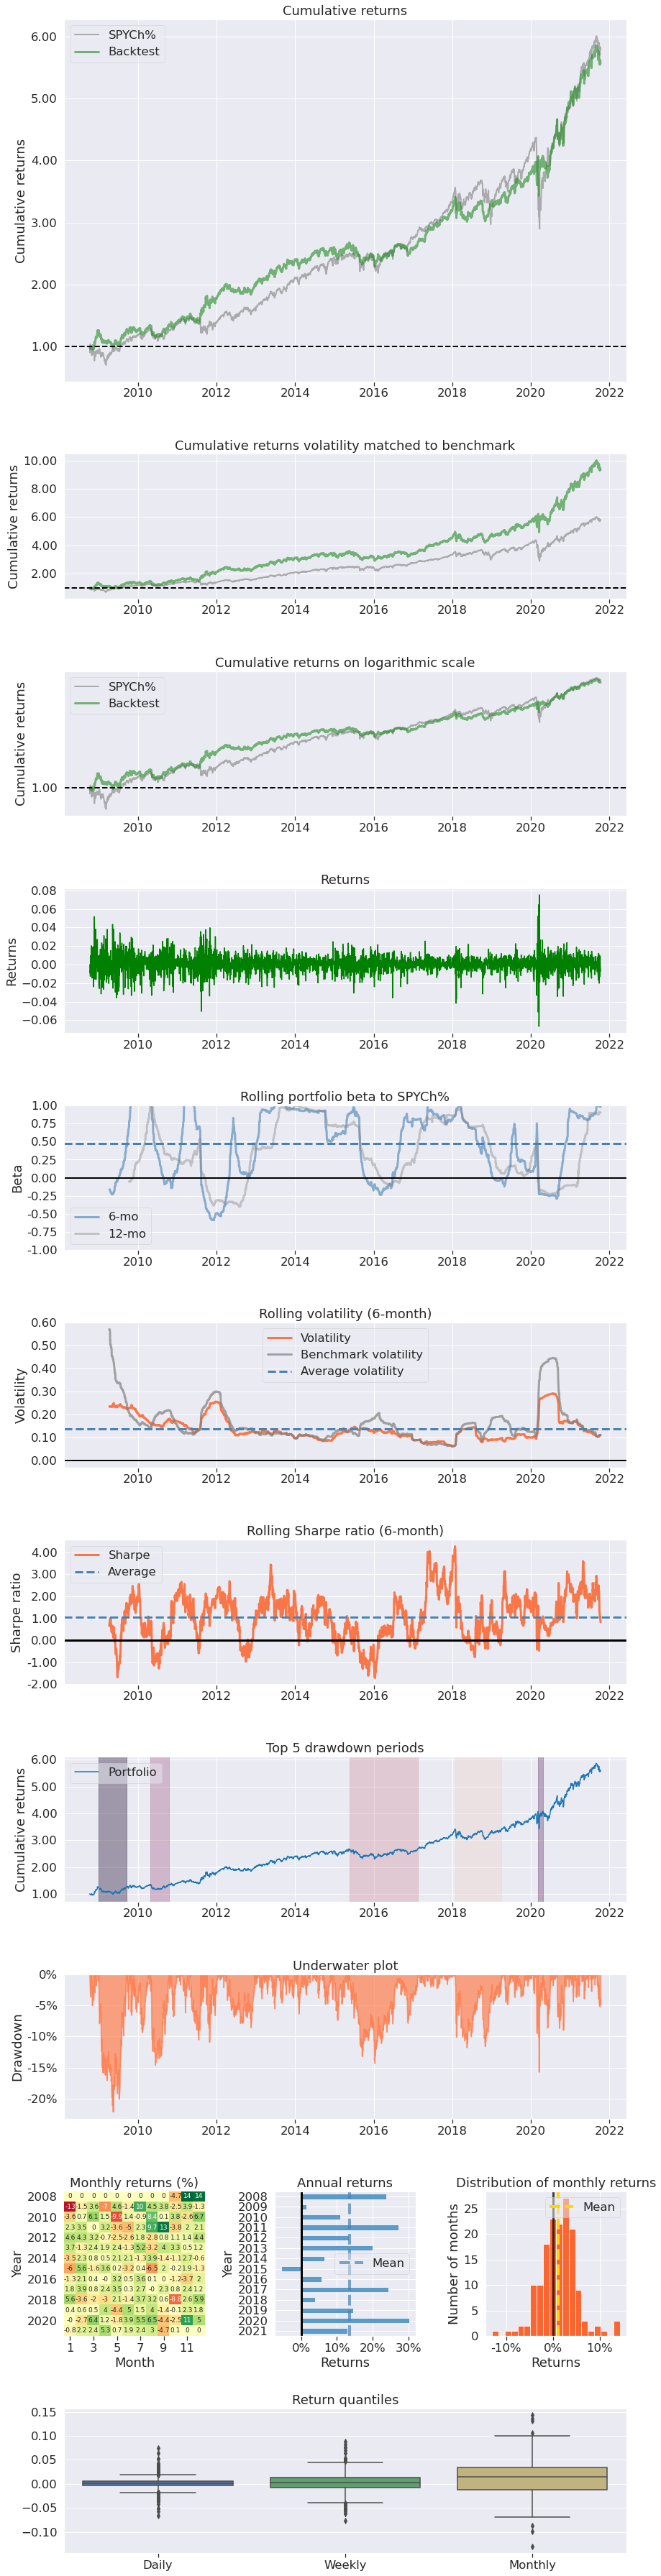

In [18]:
pf.create_returns_tear_sheet(sum_df['Portfolio_Ch%'], benchmark_rets = sum_df['SPYCh%'])

In [19]:
benchmarking = pd.concat([pf.timeseries.aggregate_returns(sum_df['Portfolio_Ch%'],'yearly'),pf.timeseries.aggregate_returns(sum_df['SPYCh%'],'yearly')], axis = 1)
benchmarking

<ipython-input-19-a47b53fae7ec>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  benchmarking = pd.concat([pf.timeseries.aggregate_returns(sum_df['Portfolio_Ch%'],'yearly'),pf.timeseries.aggregate_returns(sum_df['SPYCh%'],'yearly')], axis = 1)


,Portfolio_Ch%,SPYCh%
2008,0.237747,-0.067008
2009,0.015073,0.263661
2010,0.108358,0.150577
2011,0.272731,0.018879
2012,0.132836,0.159917
2013,0.200457,0.323067
2014,0.064445,0.134621
2015,-0.055771,0.012523
2016,0.055993,0.120013
2017,0.244094,0.217003
